# Lab 12-0 RNN Basics

In [49]:
# Libraries 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## RNN 방법

In [ ]:
# 방법1: 특정 셀을 선언하고 이를 루프함.
# 다른 방식을 적용시킬 수 있는 방법
cell = layers.SimpleRNNCell(units=hidden_size)
rnn = layers.RNN(cell, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

# 방법2: cell ,rnn 부분 통합
rnn = layers.SimpleRNN(units=hidden_size, return_sequence=True, return_state=True)
outputs, states = rnn(x_data)

In [14]:
# One-hot encoding
h = [1,0,0,0]
e = [0,1,0,0]
l = [0,0,1,0]
l = [0,0,1,0]
o = [0,0,0,1]

x_data = np.array([[h]], dtype=np.float32)
hidden_size = 2

# tensorflow에서 RNN을 이용할 때, RNN의 input:(batch_size, sequence_length, input_dimension)

cell = layers.SimpleRNNCell(units=hidden_size)
rnn = layers.RNN(cell, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

In [15]:
print('x_data = {}, shape = {}'.format(x_data, x_data.shape))
print('outputs = {}, shape = {}'.format(outputs, outputs.shape)) # 전체 sequence에 해당하는 hidden state 가짐.
print('states = {}, shape = {}'.format(states, states.shape)) # sequence의 마지막 hidden state 값만 가짐.

x_data = [[[1. 0. 0. 0.]]], shape = (1, 1, 4)
outputs = [[[0.01397352 0.58250177]]], shape = (1, 1, 2)
states = [[0.01397352 0.58250177]], shape = (1, 2)


## Unfolding to n sequences

In [18]:
x_data = np.array([[h,e,l,l,o]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print('x_data = {}, shape = {} \n'.format(x_data, x_data.shape))
print('outputs = {}, shape = {} \n'.format(outputs, outputs.shape)) # 전체 sequence에 해당하는 hidden state 가짐.
print('states = {}, shape = {}'.format(states, states.shape)) # sequence의 마지막 hidden state 값만 가짐.

x_data = [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape = (1, 5, 4) 

outputs = [[[ 0.53826106 -0.64724684]
  [ 0.7226483   0.47216213]
  [ 0.17025973 -0.5796663 ]
  [-0.68650365 -0.04160718]
  [ 0.04732385  0.3608838 ]]], shape = (1, 5, 2) 

states = [[0.04732385 0.3608838 ]], shape = (1, 2)


In [19]:
# sequence = 5
x_data = np.array([[h,e,l,l,o],
                  [e,o,l,l,l],
                  [l,l,e,e,l]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print('x_data = {}, shape = {} \n'.format(x_data, x_data.shape))
print('outputs = {}, shape = {} \n'.format(outputs, outputs.shape)) # 전체 sequence에 해당하는 hidden state 가짐.
print('states = {}, shape = {}'.format(states, states.shape)) # sequence의 마지막 hidden state 값만 가짐.

x_data = [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape = (3, 5, 4) 

outputs = [[[-0.51382005 -0.1230486 ]
  [ 0.67331725  0.682556  ]
  [-0.6701331  -0.8969959 ]
  [ 0.7751847  -0.46881172]
  [ 0.8386391  -0.9121355 ]]

 [[ 0.52256954  0.34665102]
  [ 0.4463591  -0.8034484 ]
  [ 0.59646136 -0.9177119 ]
  [ 0.6438261  -0.9409788 ]
  [ 0.6507167  -0.94659287]]

 [[ 0.00706756 -0.7427566 ]
  [ 0.6222476  -0.811965  ]
  [ 0.8421848  -0.40473554]
  [ 0.6538544  -0.5009945 ]
  [ 0.3326909  -0.93633157]]], shape = (3, 5, 2) 

states = [[ 0.8386391  -0.9121355 ]
 [ 0.6507167  -0.94659287]
 [ 0.3326909  -0.93633157]], shape = (3, 2)


# Lab 12-1 Many to one

## Word sentiment classfication

In [24]:
words = ['good', 'bad', 'worse', 'so good']
y_data = [1,0,0,1] #1은 긍정 0은 부정

#creating a token dictionary
char_set = ['<pad>'] + sorted(list(set(''.join(words)))) 
# word를 char의 sequence로 간주했을 때, 각각의 sequence의 길이가 다르기 때문에 <pad> 추가.
idx2char = {idx:char for idx, char in enumerate(char_set)}
char2idx = {char:idx for idx, char in enumerate(char_set)}

In [25]:
print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', 'a', 'b', 'd', 'e', 'g', 'o', 'r', 's', 'w']
{0: '<pad>', 1: ' ', 2: 'a', 3: 'b', 4: 'd', 5: 'e', 6: 'g', 7: 'o', 8: 'r', 9: 's', 10: 'w'}
{'<pad>': 0, ' ': 1, 'a': 2, 'b': 3, 'd': 4, 'e': 5, 'g': 6, 'o': 7, 'r': 8, 's': 9, 'w': 10}


In [26]:
# converting sequence of tokens to sequence of indices
x_data = list(map(lambda word:[char2idx.get(char) for char in word], words))
x_data_len = list(map(lambda word: len(word), x_data))

print(x_data)
print(x_data_len)

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]
[4, 3, 5, 7]


In [28]:
# padding the sequence of indices
max_sequence = 10
x_data = keras.preprocessing.sequence.pad_sequences(sequences = x_data, maxlen = max_sequence, padding='post', truncating='post')

print(x_data)
print(x_data_len)
print(y_data)

[[ 6  7  7  4  0  0  0  0  0  0]
 [ 3  2  4  0  0  0  0  0  0  0]
 [10  7  8  9  5  0  0  0  0  0]
 [ 9  7  1  6  7  7  4  0  0  0]]
[4, 3, 5, 7]
[1, 0, 0, 1]


In [29]:
# Creating simple rnn for "many to one" classification
input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))
hidden_size = 10
num_classes = 2

In [34]:
# training model
model = keras.Sequential()

model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim,
                          trainable=False, mask_zero=True, input_length=max_sequence,
                          embeddings_initializer=keras.initializers.Constant(one_hot)))
model.add(layers.SimpleRNN(units=hidden_size))
model.add(layers.Dense(units=num_classes))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 11)            121       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 10)                220       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 363
Trainable params: 242
Non-trainable params: 121
_________________________________________________________________


In [43]:
# creating Loss junction
def loss_fn(model, x, y):
    return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(
        y_true=y, y_pred=model(x), from_logits=True))

#creating an optimizer
lr = .01
epochs = 30
batch_size = 2
opt = tf.optimizers.Adam(learning_rate = lr)

# generating data pipeline
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(buffer_size=4)
tr_dataset = tr_dataset.batch(batch_size =batch_size)

print(tr_dataset)

<BatchDataset shapes: ((None, 10), (None,)), types: (tf.int32, tf.int32)>


In [44]:
# training
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
    
    if (epoch + 1) % 5 == 0:
        print('epoch = {:3}, tr_loss = {:.3f}'.format(epoch+1, avg_tr_loss))

epoch =   5, tr_loss = 0.140
epoch =  10, tr_loss = 0.026
epoch =  15, tr_loss = 0.011
epoch =  20, tr_loss = 0.006
epoch =  25, tr_loss = 0.004
epoch =  30, tr_loss = 0.003


In [45]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print('acc : {:.2%}'.format(np.mean(yhat == y_data)))

acc : 100.00%


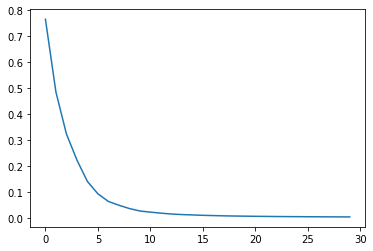

In [50]:
plt.plot(tr_loss_hist)